In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import plotly
import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio
from plotly.subplots import make_subplots

### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

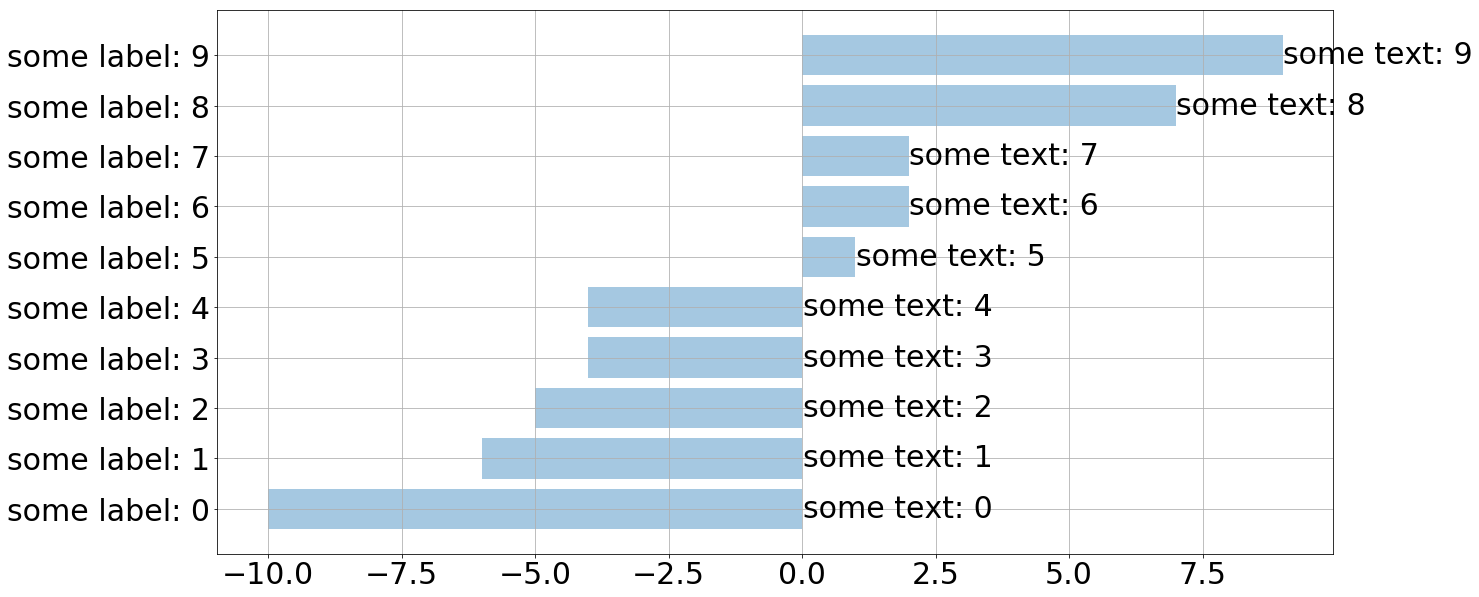

In [ ]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

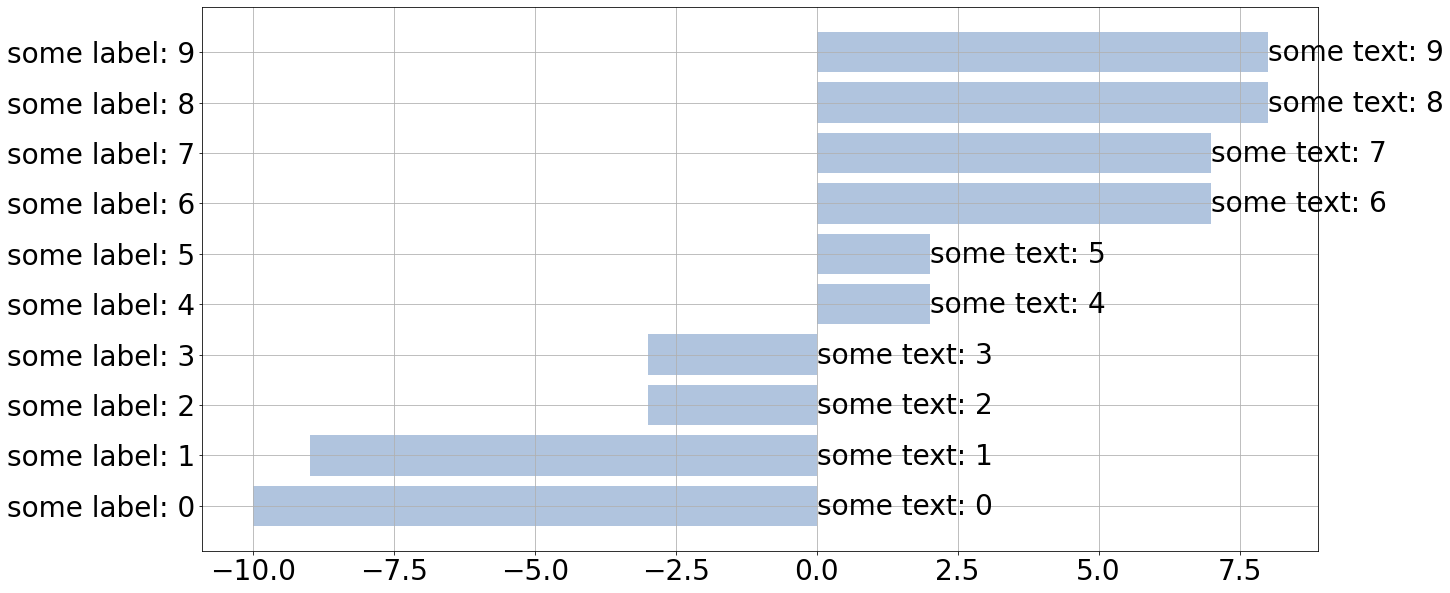

In [3]:
def plot_horizontal_bar (bars_length, labels, yticks_labels, figsize):
    '''Отрисовка в matplotlib и plotly'''
    draw_matplot(bars_length, labels, yticks_labels, figsize)
    draw_plotly(bars_length, labels, yticks_labels, figsize)

def draw_matplot(bars_length, labels, yticks_labels, figsize):
    '''Функция рисует barh в matplotlib'''
    fig, ax = plt.subplots(1, figsize=figsize)
    rects = ax.barh(
        yticks_labels, bars_length, color='lightsteelblue', label=labels
    )
    ax.tick_params(axis='both', which='major', labelsize=28)
    # рисуем аннотацию
    for text in zip(bars_length, np.arange(len(yticks_labels))-0.18, labels):
        if text[0] >= 0:
            ax.text(text[0], text[1], text[2], fontsize=28)
        else:
            ax.text(0, text[1], text[2], fontsize=28)
    ax.grid()
    plt.show()

def draw_plotly(bars_length, labels, yticks_labels, figsize):
    '''Функция рисует bar, orientation="h" в plotly'''
    fig = go.Figure()
    fig.add_trace(
        go.Bar(
            x=bars_length, y=yticks_labels, orientation='h', 
            marker=dict(color='rgba(164, 163, 204, 0.85)')
        )
    )
    # рисуем аннотацию
    for x, y, txt in zip(bars_length, yticks_labels, labels):
        if x >= 0:
            draw_plotly_annotation(fig, x, y, txt)
        else:
            draw_plotly_annotation(fig, 0, y, txt)
    # меняем размер изображения, убираем легенду, изменяем размер шрифта
    fig.update_layout(
        width = figsize[0] * 60,
        height = figsize[1] * 60,
        showlegend=False,
        font=dict(
            size=24
        )
    )

    fig.show()

def draw_plotly_annotation(fig, x, y, txt):
    '''Функция создания аннотации для plotly'''
    return fig.add_annotation(
                dict(
                    x=x, y=y, text=txt, showarrow=False, 
                    xshift=90, font=dict(size=24)
                )
            )

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)


### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [4]:
# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

NameError: ignored

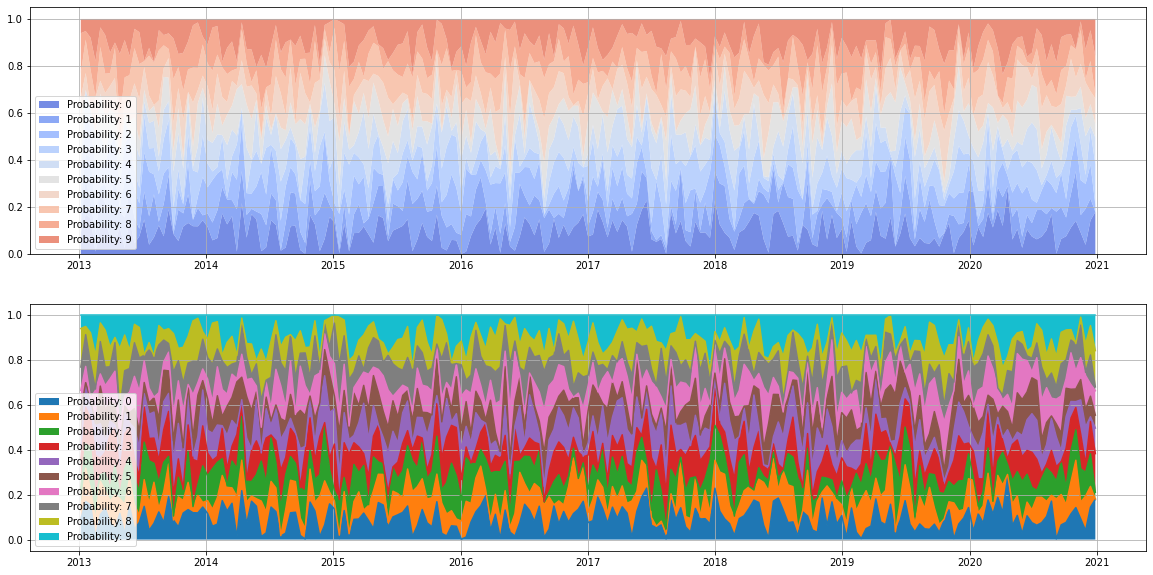

In [6]:
def plot_time_probabilities(probabilities_in_time, figsize, labels, colors):
    '''Отрисовка в matplotlib и plotly'''
    plot_matplotlib(probabilities_in_time, figsize, labels, colors)
    plot_plotly(probabilities_in_time, figsize, labels)

def plot_matplotlib(probabilities_in_time, figsize, labels, colors):
    '''Рисование matplotlib двумя вариантами'''
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)
    # Первый вариант с использованием stackplot
    ax1.stackplot(
        probabilities_in_time.index,
        [probabilities_in_time[col] for col in probabilities_in_time.columns],
        labels=labels,
        alpha=0.8,
        colors=colors # применяем color map
    )
    ax1.grid()
    ax1.legend(loc='lower left')
    # Второй вариант, использование ax.plot и ax.fill_between
    for col in probabilities_in_time.columns:
        draw_plot(ax2, probabilities_in_time, col, labels)
        if col == 0: 
            draw_fill(ax2, probabilities_in_time, 0, col + 1, labels)   
        else:
            draw_fill(ax2, probabilities_in_time, col, col+1, labels)
    ax2.grid()
    ax2.legend(loc='lower left')

def draw_plot(ax, matrix, col, labels):
    '''Рисование линий'''
    ax.plot(
        matrix.index, 
        sum([matrix[col_] for col_ in np.arange(col+1)])
    )
def draw_fill(ax, matrix, col_1, col_2, labels):
    '''Рисование заливки между линиями'''
    ax.fill_between(
        matrix.index,
        sum([matrix[col_] for col_ in np.arange(col_1)]),
        sum([matrix[col_] for col_ in np.arange(col_2)]),
        label = labels[col_1]
    )

def plot_plotly(probabilities_in_time, figsize, labels):
    '''Рисование в plotly'''
    fig = go.Figure()
    # рисование линий с заливкой между ними
    for col in probabilities_in_time.columns:
        draw_trace(fig, probabilities_in_time, col, labels, 'lines', 'one')
    # настройка вывода легенды
    fig.update_layout(
        legend=dict(
            yanchor='bottom', xanchor='left', x=0.01, y=0.01, 
#            traceorder='reversed'
        )
    )
    fig.show()

def draw_trace(fig, matrix, col, labels, mode, stackgroup):
    '''Функция рисует отдельную линию'''
    fig.add_trace(
        go.Scatter(
            x=matrix.index, y=matrix[col], name=labels[col],
            mode=mode, stackgroup=stackgroup
        )
    )
    pass

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 10)
labels = ['Probability: {}'.format(i) for i in range(10)] # создаем для сокращения 
                                                          # кода в будущем
colors = sns.color_palette("coolwarm", 11) # создаем color map с помощью seaborn

plot_time_probabilities(probabilities_in_time, figsize, labels, colors)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



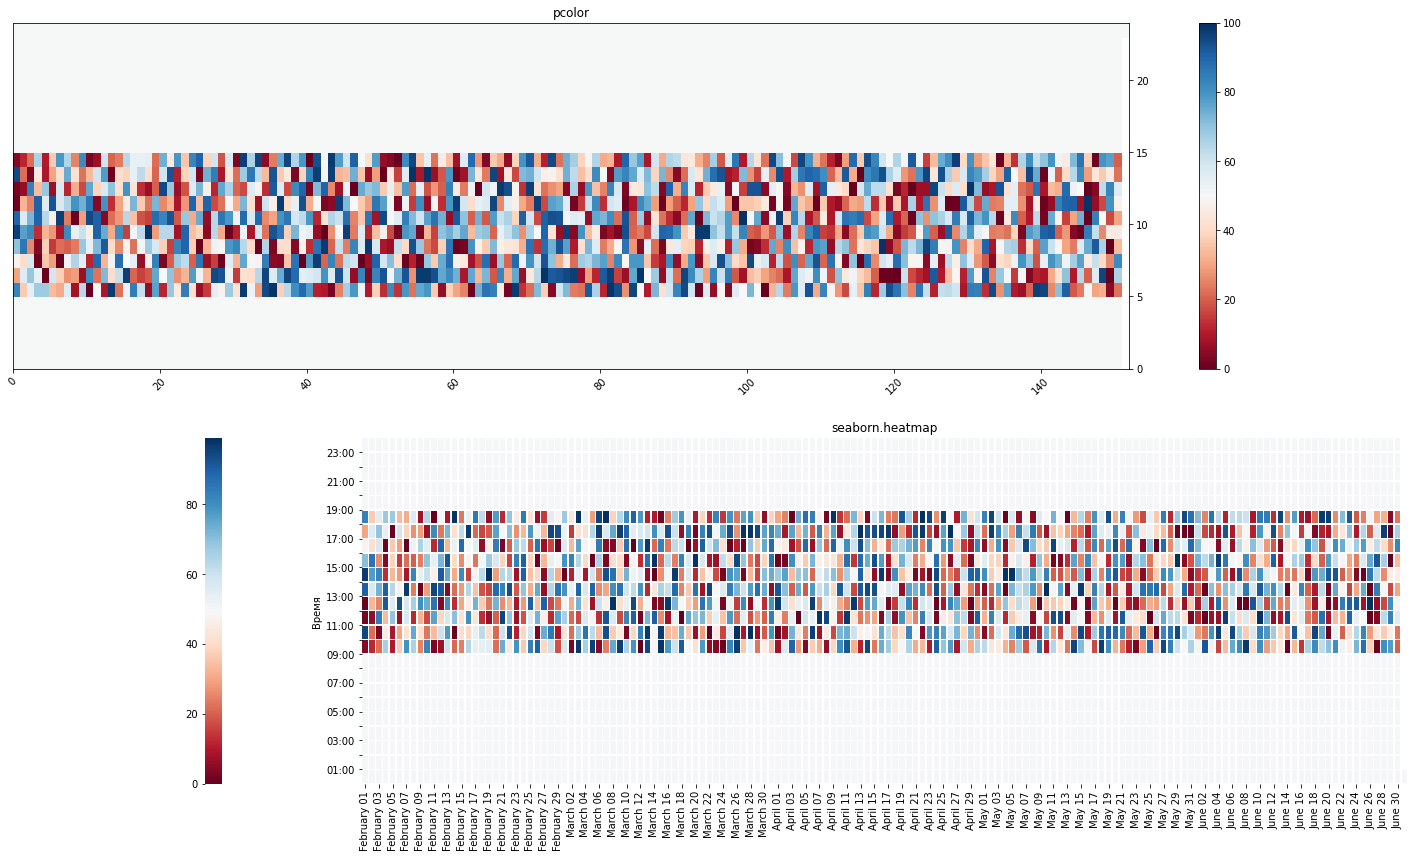

In [9]:
def plot_intraday_ts(intraday_ts, figsize):
    '''Подготовка данных для создания heatmap в seaborn'''
    intraday_ts_ = pd.DataFrame(intraday_ts).reset_index()
    intraday_ts_[['date', 'Время']] = intraday_ts_['index'].astype('str').str.split(expand=True)
    intraday_ts_['Время'] = intraday_ts_['Время'].apply(lambda x: x[:-3])
    intraday_ts_plotly = intraday_ts_.copy()
    intraday_ts_[0].fillna(value=50, inplace=True)

    df = pd.DataFrame(index=intraday_ts_['Время'][0:24])
    df_plotly = pd.DataFrame(index=intraday_ts_plotly['Время'][0:24])
    sr_day = pd.Series() # пустой Series для формирования столбцов 
                        # с часовой информацией за день
    for idx in intraday_ts_.index:
        if len(sr_day) == 24: # 24 часа в сутках
            idx_ = idx - 1    # индекс для создания заголовка столбца DF
            df[f"{intraday_ts_.at[idx_, 'index'].strftime('%B %d')}"] = sr_day
            sr_day = pd.Series()
            sr_day[intraday_ts_.at[idx, 'Время']] = intraday_ts_.at[idx, 0]
            if idx == max(intraday_ts_.index):
                df[f"{intraday_ts_.at[idx, 'index'].strftime('%B %d')}"] = sr_day
        else: 
            sr_day[intraday_ts_.at[idx, 'Время']] = intraday_ts_.at[idx, 0]

    df_ = df.iloc[::-1]
    plot_sns(df_, figsize)

def plot_sns(df_, figsize):
    '''Рисование heatmap в seaborn'''
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)
    c = ax1.pcolor(df_.to_numpy(), cmap='RdBu', vmin=0, vmax=100)
    ax1.set_title('pcolor')
    plt.yticks(
        np.arange(1, df_.shape[0]), 
        [val if idx % 2 == 0 else '' for idx, val in enumerate(df_.index)],
        rotation=0
    )
    plt.xticks(
        np.arange(1, df_.shape[1]), 
        [val if idx % 2 == 0 else '' for idx, val in enumerate(df_.columns)],
        rotation=45
    )
    fig.colorbar(c, ax=ax1)

    ax1.tick_params(axis='x', labelrotation = 45)
    ax1.yaxis.tick_right()

    
    ax2.set_title('seaborn.heatmap')
    sb = sns.heatmap(
        df_, cmap='RdBu', linewidth=0.5, 
        cbar_kws = dict(use_gridspec=False, location="left"),
        xticklabels=2
    )

    plt.yticks(
        np.arange(1, df_.shape[0]), 
        [val if idx % 2 == 0 else '' for idx, val in enumerate(df_.index)],
        rotation=0
    )


intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 14)


plot_intraday_ts(intraday_ts, figsize)

In [ ]:
# рисование heatmap в plotly. Приятно и красиво.
fig = go.Figure(data=go.Heatmap(
                   z=df,
                   x=df.columns,
                   y=df.index,
                   colorscale='RdBu'
                   ))
fig.show()

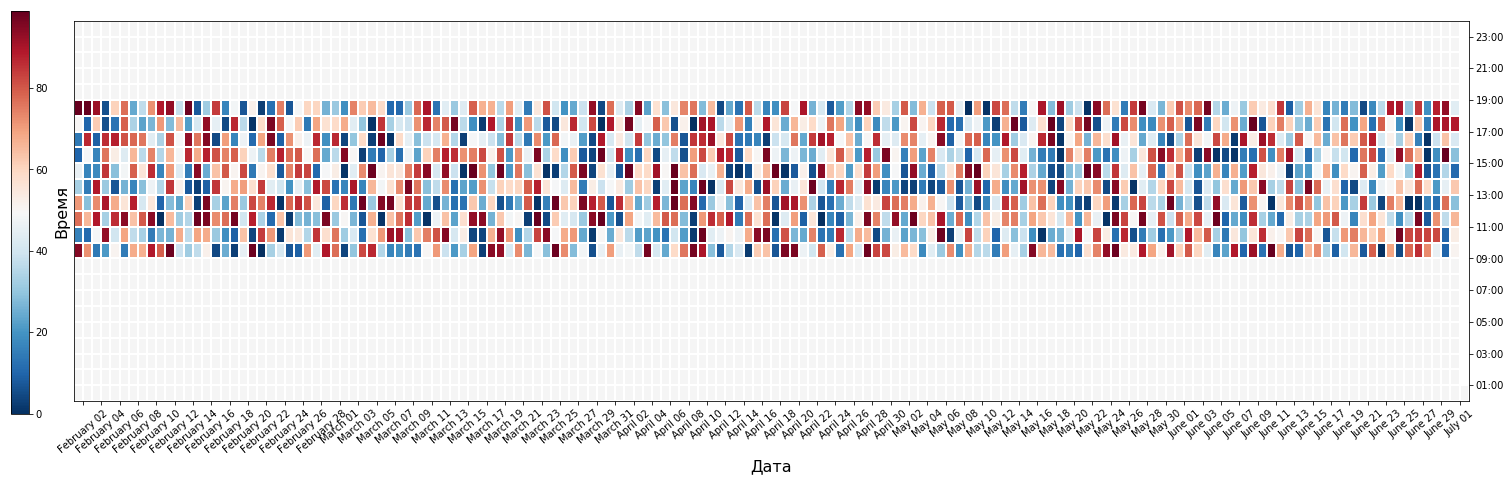

In [ ]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)


plot_intraday_ts(intraday_ts, figsize)